In [2]:
#set local path and import necessary packages
mylocalpath = "C:/Users/frank/Desktop/UpX/data/"
mylocalpath
import pandas as pd
import numpy as np
from numpy import reshape
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set parameters for the plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14

In [4]:
#read the data in the excel file to a dataframe
iris = pd.read_csv(mylocalpath+'iris.csv', index_col=False)
iris.head(10)
#iris.shape

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


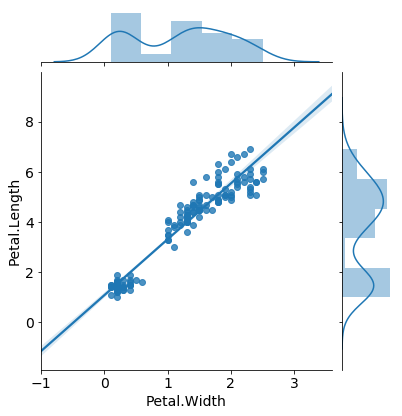

In [5]:
#Explore the relationship between the predictor (petal width) and response (petal length) variables
sns.jointplot(x=iris["Petal.Width"], y=iris["Petal.Length"], data=iris, kind='reg')

In [6]:
#Split into test and trainind data - reshape done to convert series into arrary for ML input
x_train,x_test,y_train,y_test = train_test_split(iris["Petal.Width"],iris["Petal.Length"],test_size=0.2,random_state=25)
x_train = x_train.values.reshape((x_train.shape[0],1))
x_test = x_test.values.reshape((x_test.shape[0],1))
y_train = y_train.values.reshape((y_train.shape[0],1))
y_test = y_test.values.reshape((y_test.shape[0],1))

In [7]:
#Build the linear regression model using training data
lin_reg=LinearRegression()
model = lin_reg.fit(x_train,y_train)

In [8]:
#B0 and B1 values from the model
print(model.intercept_)
print (model.coef_)

[1.12097421]
[[2.18755606]]


In [9]:
#Predicting response using the model
predicted=model.predict(x_test)

In [10]:
#Model evaluation: RMSE(Root Mean Squared Error) and R Squared values
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)))
print(metrics.r2_score(y_test, predicted))

0.45500446954014184
0.9293686678324361


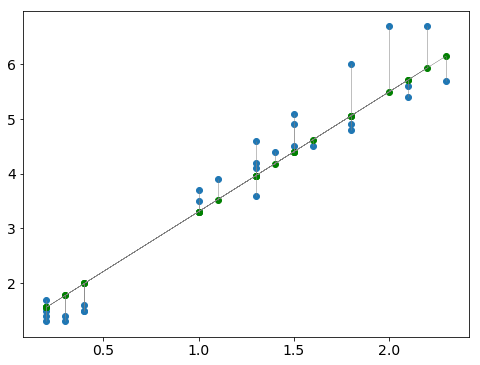

In [11]:
#Visualizing predicted values vs actual values
plt.scatter(x_test, y_test)
plt.scatter(x_test, predicted, color='green')
plt.plot(x_test,predicted, color='grey', linewidth=0.25)
plt.vlines(x_test, y_test, predicted, color='grey',linewidth=0.5)

30

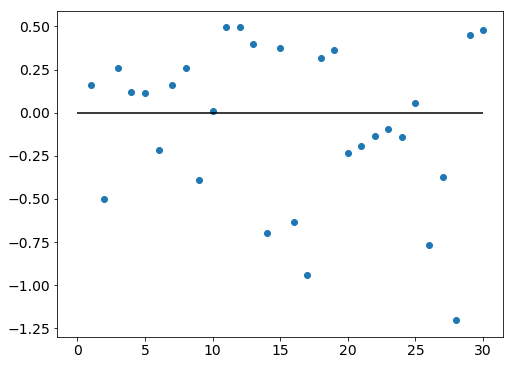

In [12]:
#Residual Plot
xax = np.linspace(1,30,30)
residual = predicted-y_test
plt.scatter(xax,residual)
plt.hlines(0,0,30)
xax.size